<a href="https://colab.research.google.com/github/G-Aswin/GasLeakDetection/blob/new_files/Gas_Leak_Detection_ML_Sample_Runs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import csv

# Load the dataset
# X = np.load('dataset.npy')
import pandas as pd
df = pd.read_csv('sample.csv', low_memory = False)
df = df.drop('DATE', axis=1)
df = df.drop('TIME', axis=1)
df = df.drop('FRAC_DAYS_SINCE_JAN1', axis=1)
df = df.drop('FRAC_HRS_SINCE_JAN1', axis=1)
df = df.drop('JULIAN_DAYS', axis=1)
df = df.drop('EPOCH_TIME', axis=1)
df = df.drop('WIND_DIRECTION', axis=1)
df = df.drop('WIND_SPEED', axis=1)
df = df.drop('WKT', axis=1)
df = df.drop('CAR_ID', axis=1)
df = df.drop('CAR_SPEED', axis=1)
df = df.drop('WS_ROTATION', axis=1)
df = df.drop('WIND_DIR_SDEV', axis=1)
df = df.drop('WIND_E', axis=1)
df = df.drop('WIND_N', axis=1)
df = df.drop('WS_SIN_HEADING', axis=1)
df = df.drop('WS_COS_HEADING', axis=1)
df = df.drop('WS_WIND_LAT', axis=1)
df = df.drop('WS_WIND_LON', axis=1)
df = df.drop('GPS_FIT', axis=1)
df = df.drop('GPS_ABS_LONG', axis=1)
df = df.drop('GPS_ABS_LAT', axis=1)

rows = df.sample(n = 5)
# X = df

X = df.to_numpy()
print(rows)


# Normalize the dataset
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Set parameters for DBSCAN algorithm
epsilon = 0.9
min_samples = 5

# Run DBSCAN algorithm
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X_norm)

# Identify outliers
outliers = np.where(clusters == -1)
print(outliers)
# print(outliers[0], len(outliers))

# Visualize results
# import matplotlib.pyplot as plt
# plt.scatter(X[:,0], X[:,1], c=clusters)
# plt.scatter(outliers[:,0], outliers[:,1], c='red')
# plt.show()

       ALARM_STATUS  INST_STATUS  CavityPressure  CavityTemp  DasTemp  \
9334              0          963      139.989098   45.002647  38.5000   
4916              0          963      139.976242   44.999382  47.8750   
2451              0          963      139.998934   45.003166  46.6250   
12112             0          963      139.981321   45.001640  45.3125   
1782              0          963      140.033035   45.000298  45.6875   

       EtalonTemp  WarmBoxTemp  species  MPVPosition   OutletValve  \
9334    44.731346    45.007317      2.0          0.0  28008.443174   
4916    44.725182    45.003502      2.0          0.0  28259.787109   
2451    44.732384    45.011070      2.0          0.0  28378.143750   
12112   44.724968    45.002159      2.0          0.0  28235.382936   
1782    44.734428    45.013115      2.0          0.0  28394.705078   

       solenoid_valves  CO2  CO2_dry       CH4  CH4_dry  H2O  
9334               0.0  0.0      0.0  1.982979      0.0  0.0  
4916          

In [ ]:
# Isolation forest

from sklearn.ensemble import IsolationForest
import pandas as pd

# Load the dataset (assuming the dataset is stored in a CSV file)
df = pd.read_csv('sample.csv', low_memory = False)
df = df.drop('DATE', axis=1)
df = df.drop('TIME', axis=1)
df = df.drop('FRAC_DAYS_SINCE_JAN1', axis=1)
df = df.drop('FRAC_HRS_SINCE_JAN1', axis=1)
df = df.drop('JULIAN_DAYS', axis=1)
df = df.drop('EPOCH_TIME', axis=1)
df = df.drop('WIND_DIRECTION', axis=1)
df = df.drop('WIND_SPEED', axis=1)
df = df.drop('WKT', axis=1)
df = df.drop('CAR_ID', axis=1)
df = df.drop('CAR_SPEED', axis=1)
df = df.drop('WS_ROTATION', axis=1)
df = df.drop('WIND_DIR_SDEV', axis=1)
df = df.drop('WIND_E', axis=1)
df = df.drop('WIND_N', axis=1)
df = df.drop('WS_SIN_HEADING', axis=1)
df = df.drop('WS_COS_HEADING', axis=1)
df = df.drop('WS_WIND_LAT', axis=1)
df = df.drop('WS_WIND_LON', axis=1)
df = df.drop('GPS_FIT', axis=1)
df = df.drop('GPS_ABS_LONG', axis=1)
df = df.drop('GPS_ABS_LAT', axis=1)

# Specify the number of trees to use in the Isolation Forest algorithm
n_estimators = 100

# Specify the proportion of anomalies to expect in the dataset (an estimate)
contamination = 0.005

# Specify the random state to ensure reproducibility of results
random_state = 42

# Fit the Isolation Forest algorithm to the dataset
clf = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=random_state)
clf.fit(df)

# Predict the anomalies in the dataset
y_pred = clf.predict(df)

# Output the indices of the anomalies (assuming -1 is the label assigned to anomalies)
anomalies = df[y_pred == -1].index
print('Anomalies detected at indices:', anomalies)

<ipython-input-39-2a80265d9c10>:7: DtypeWarning: Columns (29,30,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sample.csv')
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomalies detected at indices: Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
              11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
              22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
              33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
              44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
              55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
              66,   67,   68,   69,   72,   73,   74,   80,   90, 6582, 6583,
            6584, 6586, 6591, 6601, 6602, 6617, 6620, 6622, 6623],
           dtype='int64')


Number of outliers detected: 128


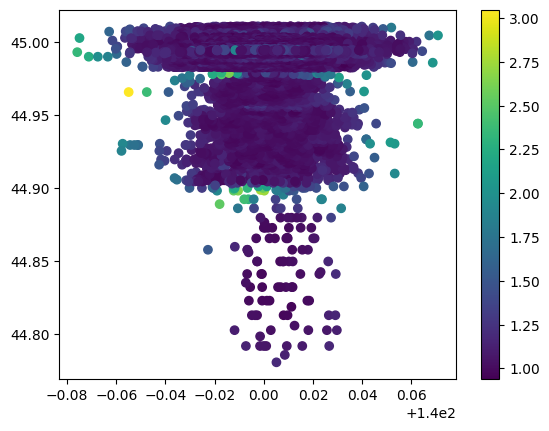

Outlier indices:
Int64Index([   56,    90,    91,    92,    93,    96,    97,    98,    99,
              100,
            ...
            15007, 15021, 15395, 15671, 15757, 15804, 16472, 16489, 16755,
            17010],
           dtype='int64', length=128)


In [ ]:
# Local Outlier Factor

import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt


# Load data from CSV
data = pd.read_csv('sample.csv', low_memory = False)

# Extract the features you want to use for anomaly detection
X = data[['CavityPressure', 'CavityTemp']].values

# Create and fit the LOF model
model = LocalOutlierFactor(n_neighbors=20, contamination='auto')
model.fit(X)

# Predict outliers
y_pred = model.fit_predict(X)

# Get the indices of the outliers
outliers = y_pred == -1
outlier_indices = data.index[outliers]

# Print the number of outliers detected
print('Number of outliers detected:', sum(outliers))

# Get the outlier values
outlier_values = X[outliers]

# Print the outlier values
# print('Outlier values:')
# print(outlier_values)

# Get the LOF scores
lof_scores = -model.negative_outlier_factor_

# Create a scatter plot with LOF scores
plt.scatter(X[:, 0], X[:, 1], c=lof_scores)
plt.colorbar()
plt.show()

print('Outlier indices:')
print(outlier_indices)



Number of outliers detected: 228


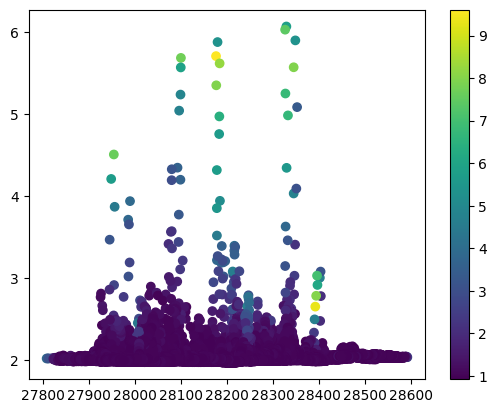

Outlier indices:
Int64Index([  398,   401,   402,   408,   426,   655,   656,   657,  1485,
             1486,
            ...
            16017, 16305, 16307, 16308, 16309, 16310, 16311, 16312, 16313,
            16314],
           dtype='int64', length=228)


In [ ]:
# Local Outlier Factor

import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt


# Load data from CSV
data = pd.read_csv('sample.csv', low_memory = False)

# Extract the features you want to use for anomaly detection
X = data[['OutletValve', 'CH4']].values

# Create and fit the LOF model
model = LocalOutlierFactor(n_neighbors=20, contamination='auto')
model.fit(X)

# Predict outliers
y_pred = model.fit_predict(X)

# Get the indices of the outliers
outliers = y_pred == -1
outlier_indices = data.index[outliers]

# Print the number of outliers detected
print('Number of outliers detected:', sum(outliers))

# Get the outlier values
outlier_values = X[outliers]

# Get the LOF scores
lof_scores = -model.negative_outlier_factor_

# Create a scatter plot with LOF scores
plt.scatter(X[:, 0], X[:, 1], c=lof_scores)
plt.colorbar()
plt.show()

print('Outlier indices:')
print(outlier_indices)

